In [ ]:
# we load the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bottleneck as bt # for faster rolling calculations, written in C
import polars as pl  # for fast data manipulation
import timeit
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)  # ignoring warnings of type UserWarning

# Exercises 2

Perform a similar analysis for **two other symbols**

# Exercise 2.1

* Create a separate data set with the necessary variables (closing prices and rates of return). 
* Plot graphs of the individual series.

In [52]:
# place for solution of Exercise 2.1
import yfinance as yf
import pandas as pd
# place for solution of Exercise 2.2


data_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/US_stocks.csv"

dataUSA = pd.read_csv(data_url, 
                      # try to parse column "timestamp" as dates/datetimes
                      parse_dates = ["timestamp"], 
                      # use column "timestamp" as dataframe index
                      index_col = "timestamp")



In [53]:
dataUSA_close = dataUSA.filter(like = "close_")
dataUSA_close.head()

,close_AAPL,close_META,close_GOOGL,close_KO,close_PEP,close_MSFT,close_GM,close_GE,close_AMZN,close_TSLA,close_WMT,close_NVDA,close_MA,close_V
timestamp,,,,,,,,,,,,,,
2025-01-02 09:31:00,247.6023,591.9156,190.3931,61.6987,150.0814,423.5085,53.0975,168.4843,222.8448,389.6899,89.8008,136.3637,524.7426,316.8013
2025-01-02 09:32:00,247.0636,591.6660,189.6449,61.6198,149.8123,424.2551,52.5506,168.4194,223.6400,386.3200,89.9898,137.5285,523.6538,316.4724
2025-01-02 09:33:00,246.6845,592.0054,189.4254,61.6297,149.8123,422.8256,52.5605,168.0850,223.1635,385.6500,89.9102,137.3785,524.1012,316.1336
2025-01-02 09:34:00,246.2006,589.5491,188.6423,61.6100,149.9006,422.1233,52.4909,168.1349,221.6900,382.4400,89.8486,136.7164,523.8328,315.9542
2025-01-02 09:35:00,245.7567,588.9803,188.6373,61.6642,149.9251,422.1034,52.4154,168.4444,221.3900,381.8500,89.8853,136.5386,523.8974,316.5821


In [54]:
dataUSA_r = np.log(dataUSA_close / dataUSA_close.shift(1)) * 10000

In [55]:
dataUSA_close.ffill(inplace = True)


/var/folders/rz/hb914cgn7wb_sxdhbbm8krnh0000gn/T/ipykernel_25142/3117142738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUSA_close.ffill(inplace = True)


In [56]:

dataUSA_r.columns = [col.replace("close_" , "r_") for col in dataUSA_r]
dataUSA_r.head()

,r_AAPL,r_META,r_GOOGL,r_KO,r_PEP,r_MSFT,r_GM,r_GE,r_AMZN,r_TSLA,r_WMT,r_NVDA,r_MA,r_V
timestamp,,,,,,,,,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,-21.780366,-4.217707,-39.375061,-12.796135,-17.946364,17.613405,-103.533312,-3.852733,35.620511,-86.852531,21.024466,85.055874,-20.770777,-10.387295
2025-01-02 09:33:00,-15.356011,5.734700,-11.580967,1.606497,0.000000,-33.751244,1.883721,-19.874932,-21.329295,-17.358192,-8.849361,-10.912782,8.540165,-10.711249
2025-01-02 09:34:00,-19.635414,-41.577490,-41.426502,-3.197022,5.892306,-16.623494,-13.250658,2.968295,-66.246771,-83.584442,-6.853629,-48.311828,-5.122460,-5.676427
2025-01-02 09:35:00,-18.046287,-9.652709,-0.265055,8.793406,1.634283,-0.471437,-14.393800,18.390916,-13.541575,-15.439169,4.083815,-13.013487,1.233142,19.853413


In [57]:
dataUSA_MSFT_NVDA = pd.concat(
    [dataUSA_close[['close_MSFT' , 'close_NVDA']],
     dataUSA_r[['r_MSFT', 'r_NVDA']]],
    axis = 1 )

dataUSA_MSFT_NVDA.head()

,close_MSFT,close_NVDA,r_MSFT,r_NVDA
timestamp,,,,
2025-01-02 09:31:00,423.5085,136.3637,NaN,NaN
2025-01-02 09:32:00,424.2551,137.5285,17.613405,85.055874
2025-01-02 09:33:00,422.8256,137.3785,-33.751244,-10.912782
2025-01-02 09:34:00,422.1233,136.7164,-16.623494,-48.311828
2025-01-02 09:35:00,422.1034,136.5386,-0.471437,-13.013487


In [58]:
dataUSA_MSFT_NVDA = dataUSA_MSFT_NVDA.dropna()
dataUSA_MSFT_NVDA.head(1)

,close_MSFT,close_NVDA,r_MSFT,r_NVDA
timestamp,,,,
2025-01-02 09:32:00,424.2551,137.5285,17.613405,85.055874


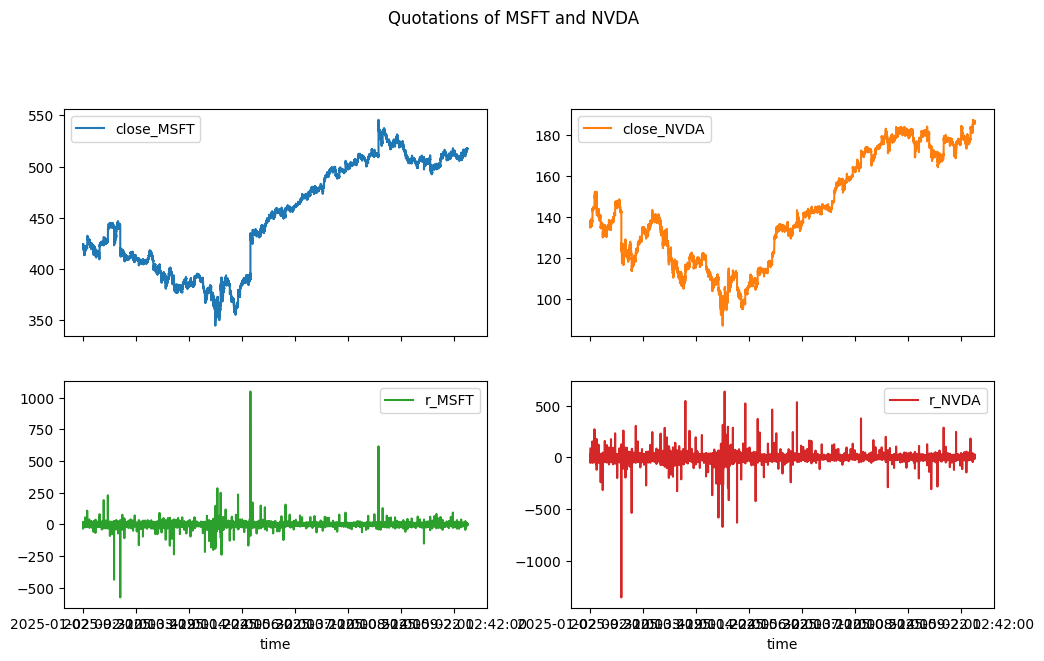

In [61]:
dataUSA_MSFT_NVDA_plot = dataUSA_MSFT_NVDA.copy()
dataUSA_MSFT_NVDA['time'] = dataUSA_MSFT_NVDA_plot.index.astype(str)
dataUSA_MSFT_NVDA_plot = dataUSA_MSFT_NVDA_plot.reset_index(drop = True)

dataUSA_MSFT_NVDA_plot.plot(
    x = 'time',
    subplots = True,
    layout = (3,2),
    title = "Quotations of MSFT and NVDA", 
    figsize = (12, 10)
)

plt.show()

# Exercise 2.2

Calculate and plot the standard deviation in a 150-minute rolling window for the **difference** between the rates of return of the selected assets (r1-r2).

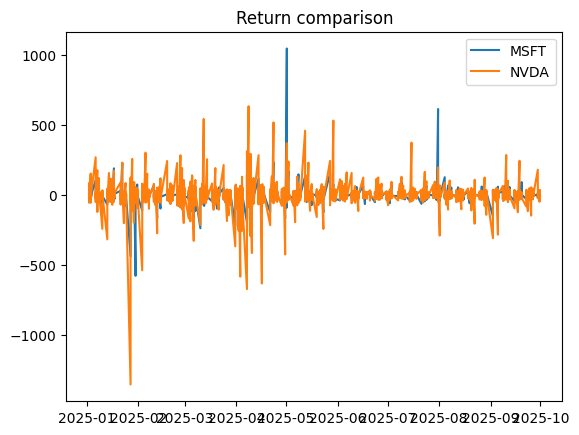

In [ ]:
# Plotting plain returns
plt.plot(dataUSA_MSFT_NVDA['r_MSFT'], label = 'MSFT')
plt.plot(dataUSA_MSFT_NVDA['r_NVDA'], label = 'NVDA')
plt.title('Return comparison')
plt.legend()
plt.show()


In [ ]:
# Checking no rolling std deviation first
MSFT_r_std = dataUSA_MSFT_NVDA['r_MSFT'].std()
NVDA_r_std = dataUSA_MSFT_NVDA['r_NVDA'].std()
dataUSA_MSFT_NVDA['r_diff_MSFT_NVDA'] =  dataUSA_MSFT_NVDA['r_MSFT'] - dataUSA_MSFT_NVDA['r_NVDA']
print(MSFT_r_std)
print(NVDA_r_std)

9.163520265237738
16.609439496773522


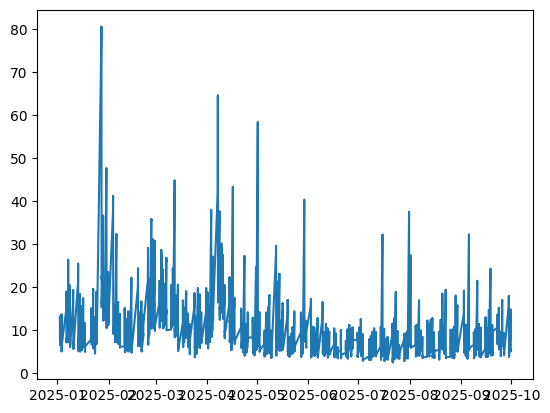

In [ ]:
# Rolling Std deviation on a rolling window of 150 observations.
dataUSA_MSFT_NVDA['r_diff_MSFT_rollstd_150'] = dataUSA_MSFT_NVDA['r_diff_MSFT_NVDA'].rolling(window= 150).std(ddof=1)
plt.plot(dataUSA_MSFT_NVDA['r_diff_MSFT_rollstd_150'].dropna())



# Exercise 2.3

Plot the change in the correlation coefficient between rates of return for a moving window of 90 minutes.

<Axes: xlabel='timestamp'>

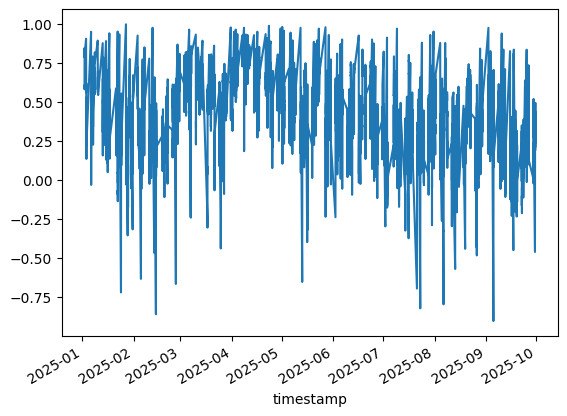

In [78]:
# place for solution of Exercise 2.3
dataUSA_MSFT_NVDA['rollcorr90_r_MSFT_NVDA'] = dataUSA_MSFT_NVDA['r_MSFT'].rolling(window = 90).corr(dataUSA_MSFT_NVDA['r_NVDA'])
dataUSA_MSFT_NVDA['rollcorr90_r_MSFT_NVDA'].dropna().plot()


# Exercise 2.4

Save the dataset to the 'outputs' folder for further analysis.

In [80]:
# place for solution of Exercise 2.4
dataUSA_MSFT_NVDA.to_pickle("outputs/dataUSA_MSFT_NVDA.pkl")